<a href="https://colab.research.google.com/github/AI-Champ/Temperature_prediction/blob/main/Temperature_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/All_Datasets/Time_series/Weather_forecasting/DailyDelhiClimateTrain.csv')
test=pd.read_csv('/content/drive/MyDrive/All_Datasets/Time_series/Weather_forecasting/DailyDelhiClimateTest.csv')

In [ ]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
train.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
len(test)

114

In [ ]:
test=test.drop(0)


In [ ]:
len(test)

113

In [ ]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727


In [ ]:
train=train.loc[:,['date','meantemp']]
test=test.loc[:,['date','meantemp']]

# EDA

In [ ]:
train.isna().sum()

date        0
meantemp    0
dtype: int64

In [ ]:
test.isna().sum()

date        0
meantemp    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1462 non-null   object 
 1   meantemp  1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      113 non-null    object 
 1   meantemp  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1462 non-null   datetime64[ns]
 1   meantemp  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      113 non-null    datetime64[ns]
 1   meantemp  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [ ]:
train=train.set_index('date')
test=test.set_index('date')

In [ ]:
train.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [ ]:
test.head()

,meantemp
date,
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
2017-01-06,19.318182


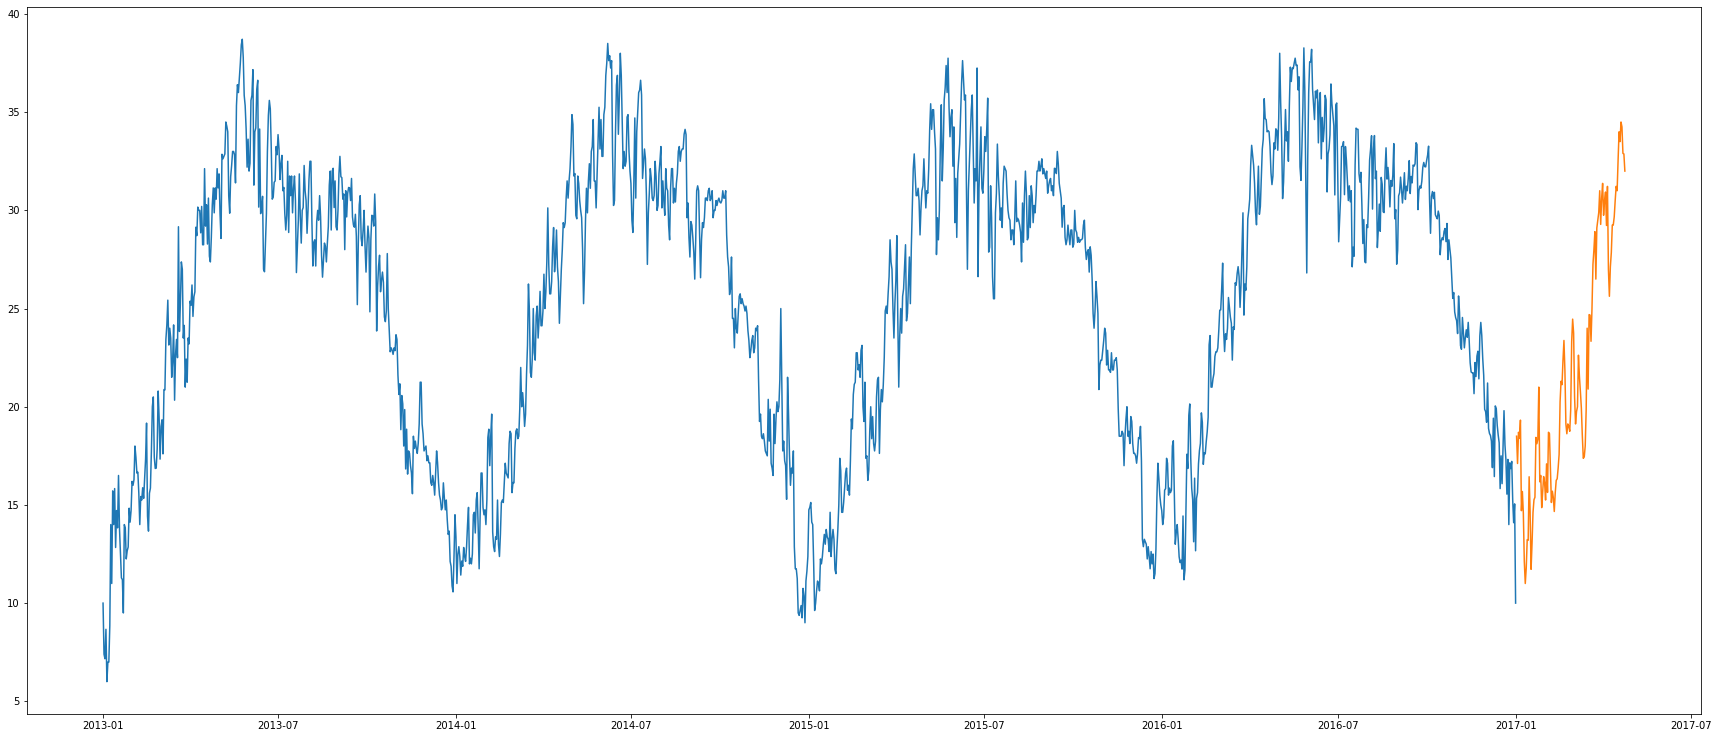

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=30,13



plt.plot(train['meantemp'])
plt.plot(test['meantemp'])

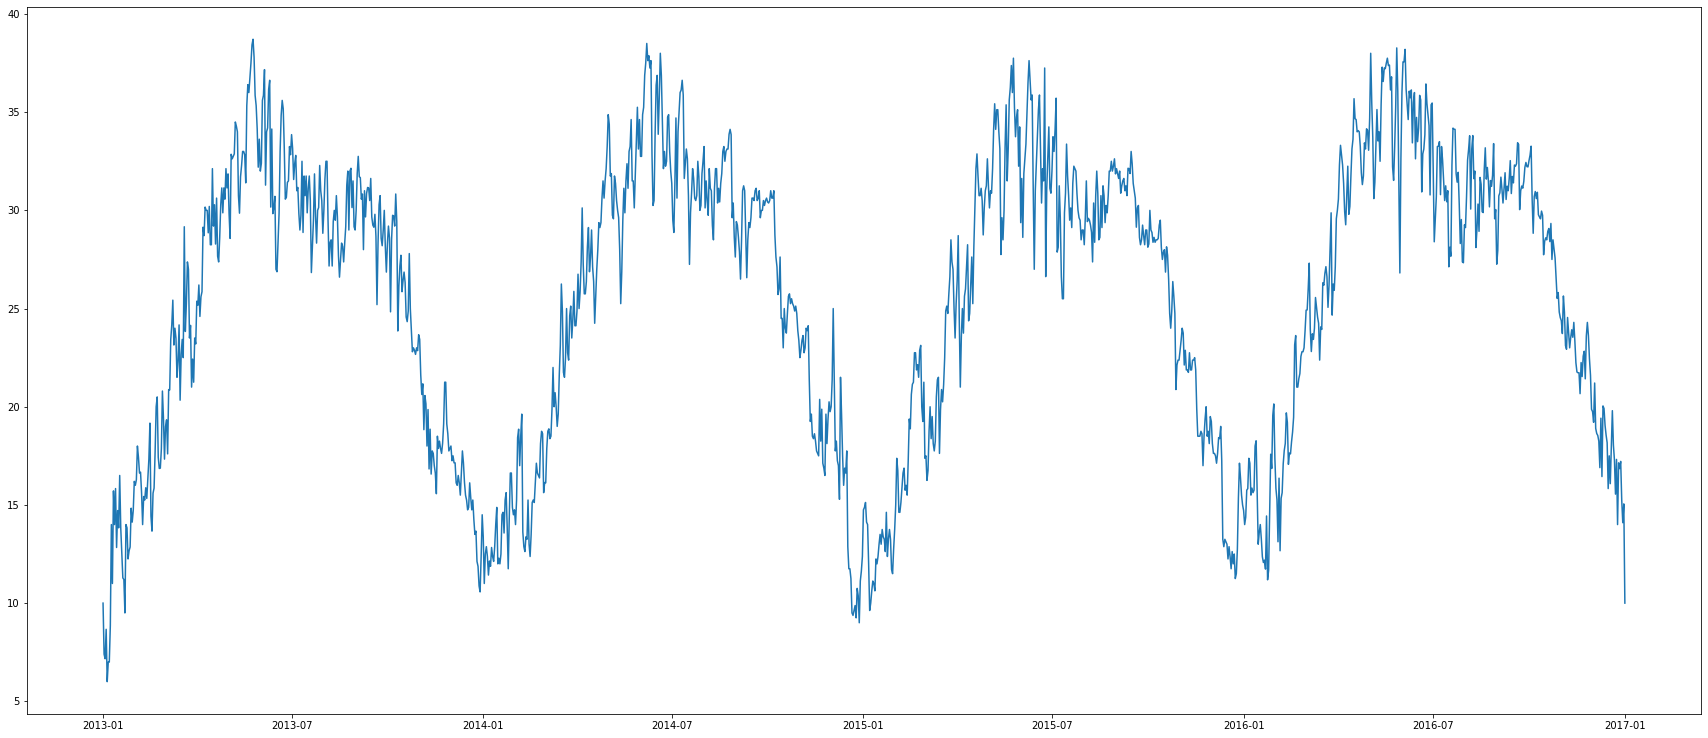

In [ ]:
plt.plot(train['meantemp'])

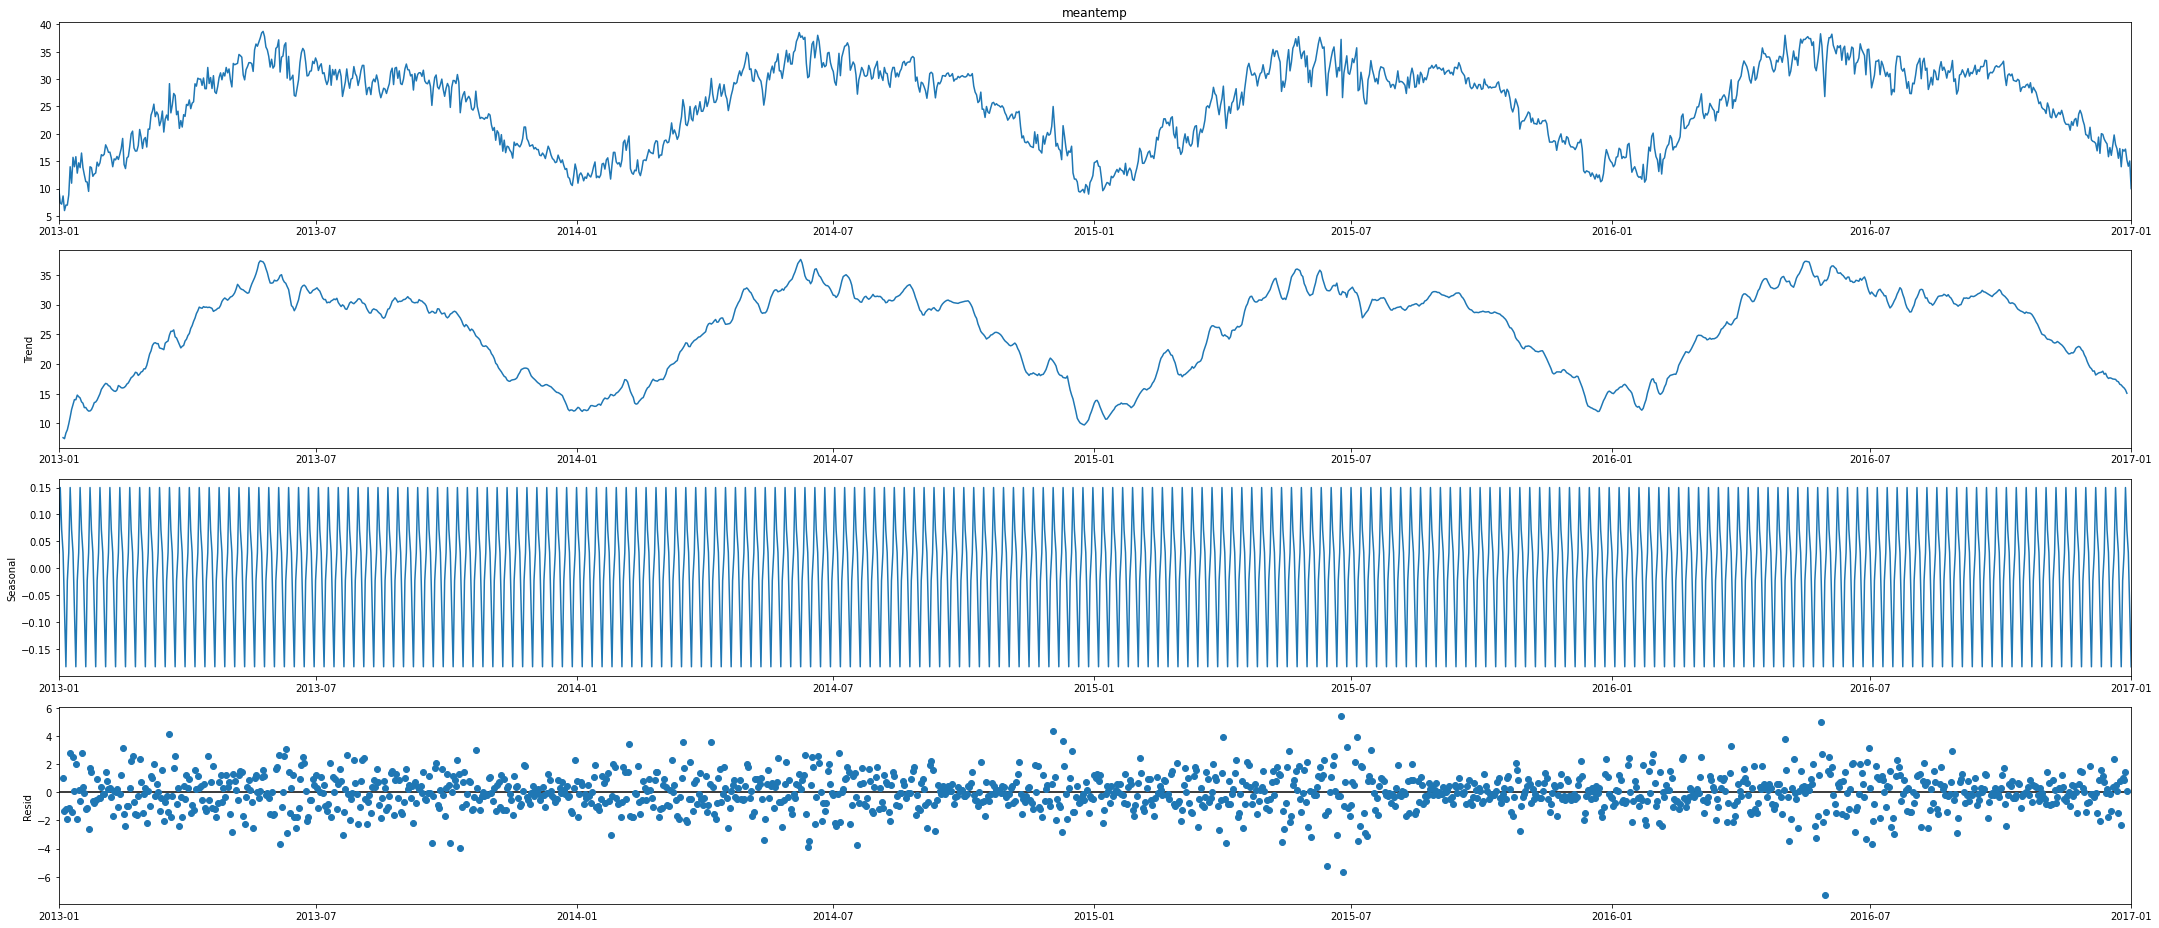

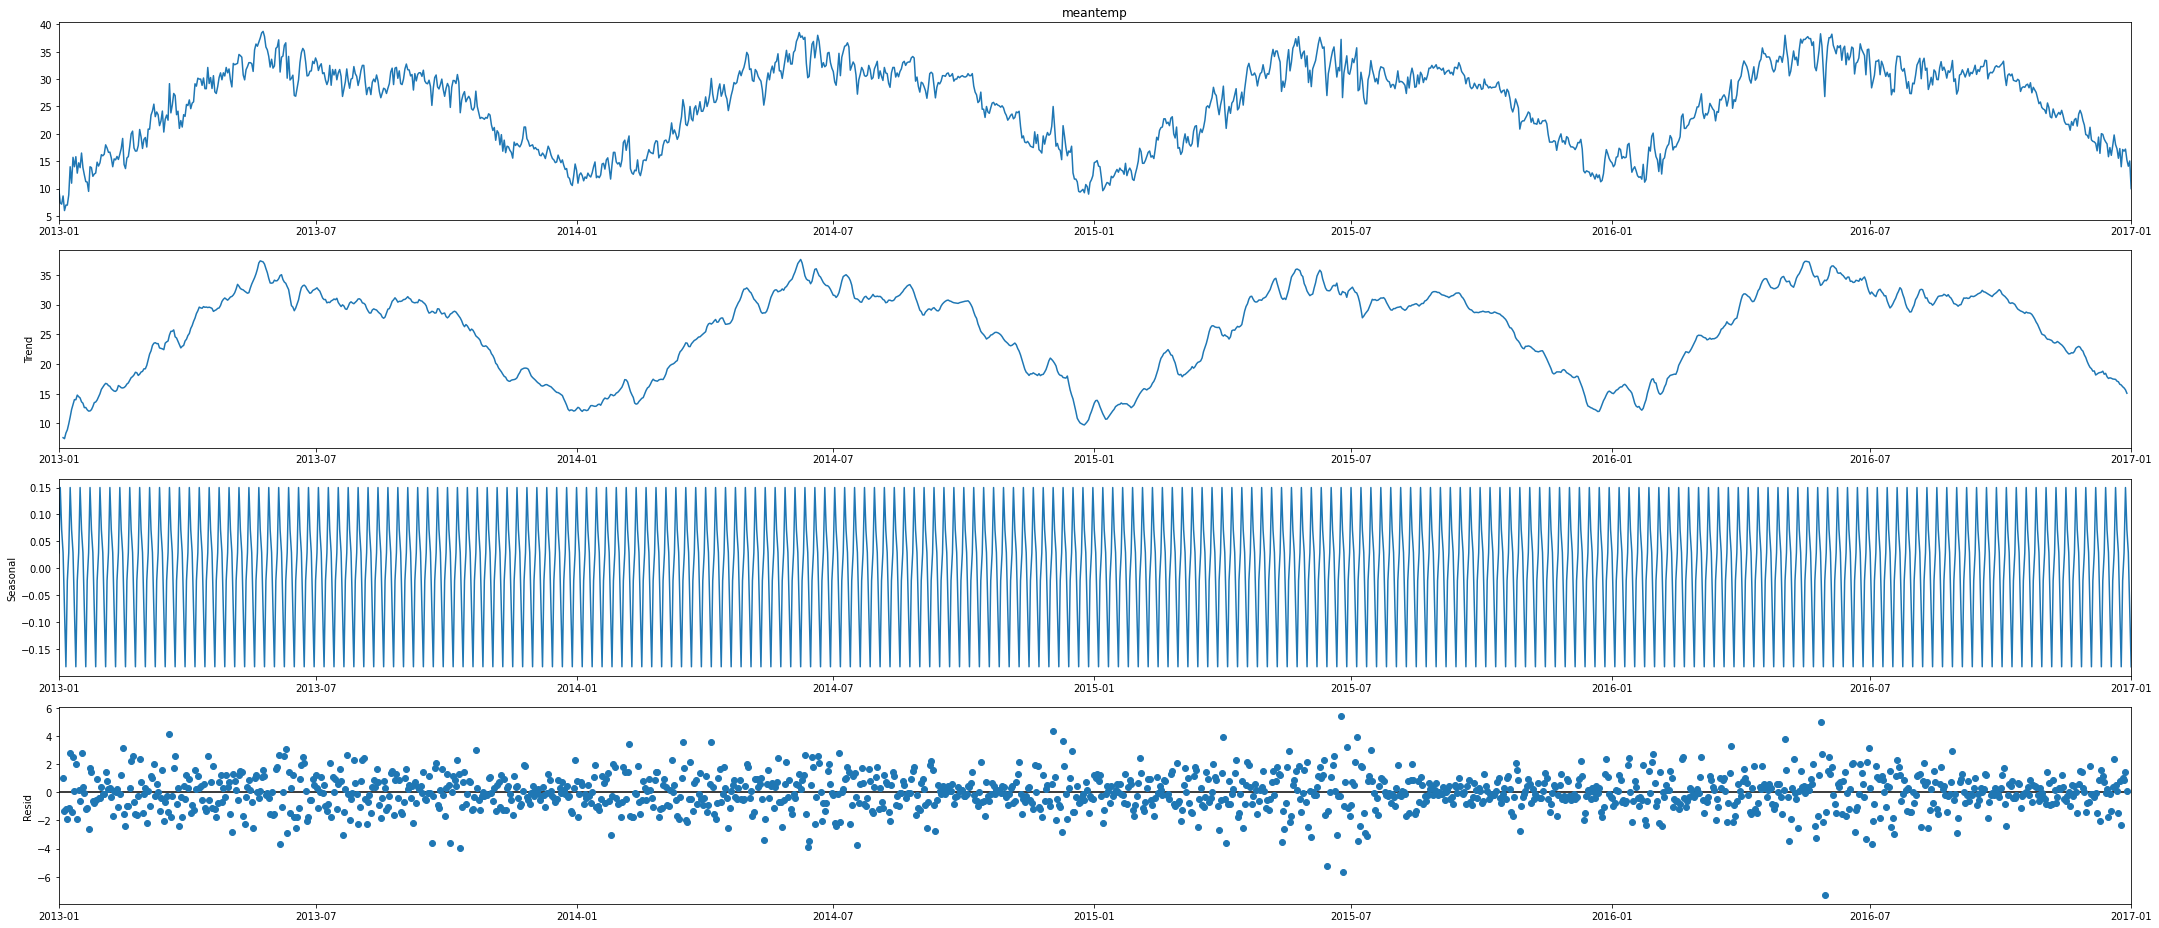

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(train['meantemp'])
results.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)

# Model building.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 100
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# define model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# # Adding droupout layer.


# from keras.layers import Dropout

# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# adam = optimizers.Adam(lr=0.0001)
# model.compile(optimizer=adam, loss='mse')

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras import optimizers

# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1))
# adam = optimizers.Adam(lr=0.0001)
# model.compile(optimizer=adam, loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # fit model
model.fit(generator,epochs=6)

Epoch 1/6
1362/1362 [==============================] - 45s 32ms/step - loss: 0.0114
Epoch 2/6
1362/1362 [==============================] - 41s 30ms/step - loss: 0.0045
Epoch 3/6
1362/1362 [==============================] - 41s 30ms/step - loss: 0.0040
Epoch 4/6
1362/1362 [==============================] - 41s 30ms/step - loss: 0.0034
Epoch 5/6
1362/1362 [==============================] - 41s 30ms/step - loss: 0.0031
Epoch 6/6
1362/1362 [==============================] - 42s 31ms/step - loss: 0.0029


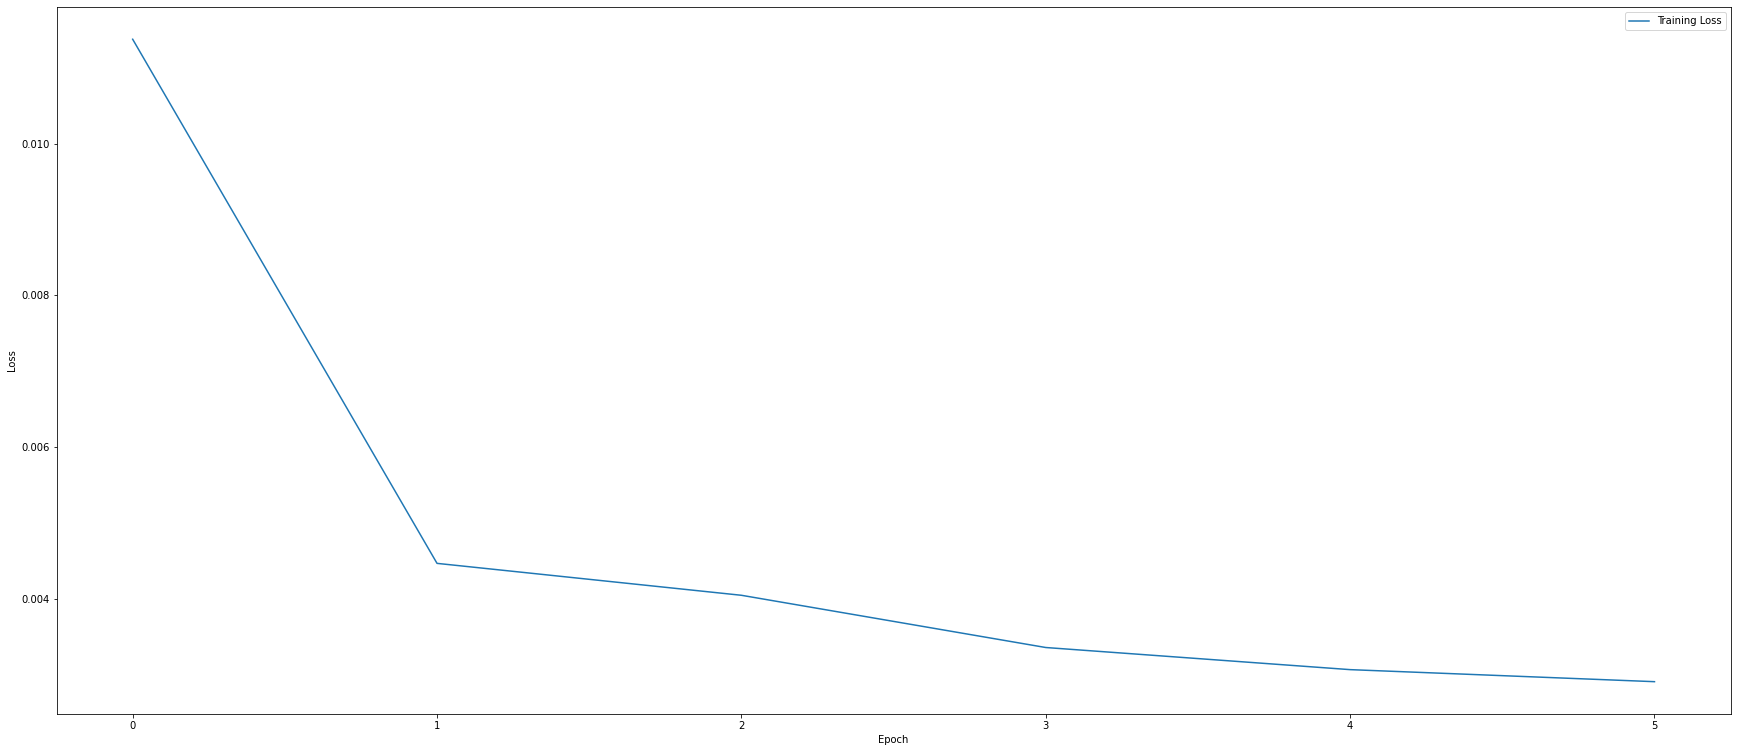

In [ ]:
loss_per_epoch = model.history.history['loss']

plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting the predction for test data.

In [ ]:
test_predictions = []

current_batch = scaled_train[-n_input:].reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [ ]:
test_predictions

[array([0.21439363], dtype=float32),
 array([0.22299835], dtype=float32),
 array([0.22756168], dtype=float32),
 array([0.23162821], dtype=float32),
 array([0.23552364], dtype=float32),
 array([0.23938966], dtype=float32),
 array([0.24328464], dtype=float32),
 array([0.24723521], dtype=float32),
 array([0.25124994], dtype=float32),
 array([0.25532717], dtype=float32),
 array([0.25945973], dtype=float32),
 array([0.26363784], dtype=float32),
 array([0.2678534], dtype=float32),
 array([0.27211487], dtype=float32),
 array([0.27641666], dtype=float32),
 array([0.2807526], dtype=float32),
 array([0.28511682], dtype=float32),
 array([0.28950378], dtype=float32),
 array([0.2939083], dtype=float32),
 array([0.29832566], dtype=float32),
 array([0.30275142], dtype=float32),
 array([0.3071816], dtype=float32),
 array([0.31161252], dtype=float32),
 array([0.31604087], dtype=float32),
 array([0.32046366], dtype=float32),
 array([0.32487804], dtype=float32),
 array([0.32928154], dtype=float32),
 arra

In [ ]:
test.head()

,meantemp
date,
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
2017-01-06,19.318182


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.head()

,meantemp,Predictions
date,,
2017-01-02,18.500000,13.013734
2017-01-03,17.111111,13.295232
2017-01-04,18.700000,13.444518
2017-01-05,18.388889,13.577551
2017-01-06,19.318182,13.704988


<Axes: xlabel='date'>

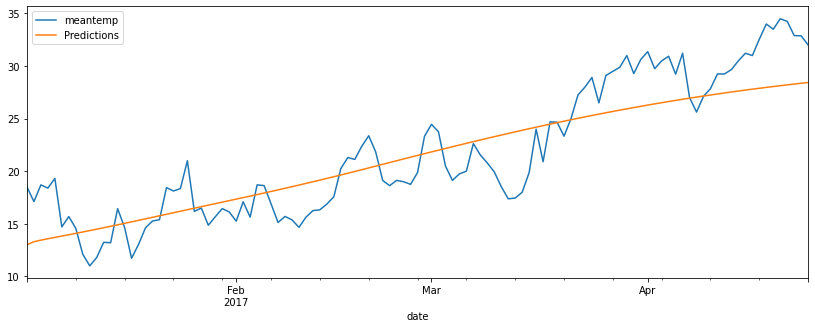

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
# from math import sqrt
mse=mean_squared_error(test['meantemp'],test['Predictions'])
print(mse)

9.48810999738056
